<a target="_blank" href="https://colab.research.google.com/github/DoSomeWaffles/test-ai-safety-basics/blob/main/ex_1_numpy_to_pytorch.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Approximate the sine function with a polynomial of degree 3

The goal of this notebook is to understand the basics of neural networks by creating a simple neural network composed of a single layer.
If you have never heard of neural networks before, we recommend you to watch the following video series (3Blue1Brown) to get a better understanding of the topic:
- 1. [But what is a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) (~20 min)
- 2. [Gradient descent, how neural networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w) (~20 min)
- 3. [Backpropagation, step-by-step](https://www.youtube.com/watch?v=Ilg3gGewQ5U) (~10 min)
- 4. [Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8) (~10 min "bonus" if you want to understand more about the calculus)

In this notebook, we will be gradually moving up in the abstraction ladder:
- 1. Bare Numpy (You need to compute the gradient by hand)
- 2. Autograd (Here you do not need to compute the gradient by hand anymore)
- 3. torch.nn (Using the nn Abstraction in pytorch)
- 4. Optimizer Abstraction (Finally, we don't even need to iterate on the parameters to update them)

## Tensors
### Warm-up: numpy
Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

If you are not familiar with numpy, you can use this website: [speedsheet](https://speedsheet.io/s/numpy)

In [10]:
import matplotlib.pyplot as plt

def plot(y_pred, y, x):
    plt.plot(x, y, label='y (actual)')
    plt.plot(x, y_pred, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Given that y is generated using the sine function (y = np.sin(x)), you will fit a third-order polynomial to approximate the sine function using numpy. The polynomial has the form:

$$
[ y_{\text{pred}} = a + bx + cx^2 + dx^3 ]
$$

You need to:

1. Compute the predicted y values (`y_pred`) using the polynomial equation with the given weights and input x.
2. Compute the loss (mean squared error loss) between the predicted y values and the actual y values.
3. Compute the gradients of the loss with respect to the weights a, b, c, and d.
4. Update the weights using gradient descent.

To calculate the gradients, you can use the chain rule of calculus. For each weight, you need to compute the partial derivative of the loss with respect to that weight. Here's a hint on how to calculate the gradients:

- The gradient of the loss with respect to `a` is the sum of the gradients of the loss with respect to each `y_pred` times the gradient of `y_pred` with respect to `a`.
- The gradient of the loss with respect to `b` is the sum of the gradients of the loss with respect to each `y_pred` times the gradient of `y_pred` with respect to `b`.
- Similarly, compute the gradients for `c` and `d`.


<details>
<summary>
How to calculate the gradients ?
</summary>

> ### Gradient Computation for Polynomial Regression Models
>
> #### Mean Squared Error Loss Function
>
> The optimization process begins with the Mean Squared Error (MSE) loss function, defined as:
>
> $$
> L = \frac{1}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)^2
> $$
>
> where n represents the number of observations, $y_{\text{pred}_i}$ denotes the predicted value, and $y_i$ represents the observed value.
>
> #### Gradient Derivation
>
> The gradient with respect to any weight parameter w is obtained through application of the chain rule:
>
> $$
> \frac{\partial L}{\partial w} = \frac{1}{n}\sum_{i=1}^n \frac{\partial L}{\partial y_{\text{pred}_i}} \cdot \frac{\partial y_{\text{pred}_i}}{\partial w}
> $$
>
> The derivative of the loss function with respect to the predicted value yields:
>
> $$
> \frac{\partial L}{\partial y_{\text{pred}_i}} = 2(y_{\text{pred}_i} - y_i)
> $$
>
> #### Parameter-Specific Derivatives
>
> For a cubic polynomial with parameters a, b, c, and d, the partial derivatives with respect to each parameter are:
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial a} = 1
> $$
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial b} = x_i
> $$
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial c} = x_i^2
> $$
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial d} = x_i^3
> $$
>
> #### Complete Gradient Expressions
>
> Combining these results yields the following gradient expressions:
>
> For the constant term a:
>
> $$
> \frac{\partial L}{\partial a} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)
> $$
>
> For the linear coefficient b:
>
> $$
> \frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)x_i
> $$
>
> For the quadratic coefficient c:
>
> $$
> \frac{\partial L}{\partial c} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)x_i^2
> $$
>
> For the cubic coefficient d:
>
> $$
> \frac{\partial L}{\partial d} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)x_i^3
> $$
>
> These gradient expressions govern the parameter updates during optimization. The magnitude and direction of parameter adjustments are determined by both the prediction error $(y_{\text{pred}_i} - y_i)$ and the corresponding polynomial terms. A positive gradient indicates that the parameter should be decreased to reduce the loss function, while a negative gradient suggests an increase in the parameter value.

</details>


In [29]:
import numpy as np
import math

# Create random input and output data. This allows us to generate a random dataset of 1000 points with a y = sin(x) function.
x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)

# Randomly initialize weights between -1 and 1
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3
epochs = 3000
for t in range(epochs):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute the loss (mean squared error loss)
    loss = np.mean((y_pred - y) ** 2)
    if t % 100 == 99:
        print(t, loss)

    # Compute the gradients of the loss (mean squared error loss) wrt a, b, c, d
    grad_y_pred = 2.0 * (y_pred - y) / y.size
    grad_a = np.sum(grad_y_pred)
    grad_b = np.sum(grad_y_pred * x)
    grad_c = np.sum(grad_y_pred * x**2)
    grad_d = np.sum(grad_y_pred * x**3)

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 2.1710115487077397
199 1.8097858623343366
299 1.5092717775077298
399 1.2590659351405602
499 1.0506954264640789
599 0.8771234076236019
699 0.7325040763478139
799 0.6119797698443741
899 0.5115128578896319
999 0.4277464242051886
1099 0.3578887731450119
1199 0.2996176600270098
1299 0.2510008542918509
1399 0.2104302315114177
1499 0.17656707487267648
1599 0.148296667056387
1699 0.12469058417764514
1799 0.1049753768185972
1899 0.0885065491845048
1999 0.07474693431285497
2099 0.06324871787172284
2199 0.05363849101459601
2299 0.04560481864760712
2399 0.038887897134813894
2499 0.03327094807353315
2599 0.028573054920271998
2699 0.02464319909034035
2799 0.0213552934684487
2899 0.018604045522488087
2999 0.01630151062253024


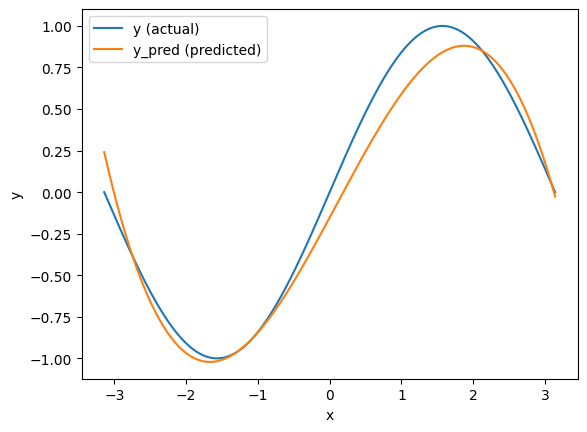

In [30]:
# Check with the plot!
plot(y_pred, y, x)

### PyTorch: Tensors
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network.

**Note:** This is very close to the numpy implementation, and is more a translation exercise than one where you need to think a lot. We're just doing things step by step.

You can check the pytorch cheat sheet to get back into the swing of things: https://pytorch.org/tutorials/beginner/ptcheat.html

99 tensor(2.4477)
199 tensor(2.0155)
299 tensor(1.6621)
399 tensor(1.3712)
499 tensor(1.1317)
599 tensor(0.9344)
699 tensor(0.7719)
799 tensor(0.6379)
899 tensor(0.5275)
999 tensor(0.4365)
1099 tensor(0.3614)
1199 tensor(0.2994)
1299 tensor(0.2483)
1399 tensor(0.2061)
1499 tensor(0.1712)
1599 tensor(0.1424)
1699 tensor(0.1186)
1799 tensor(0.0990)
1899 tensor(0.0827)
1999 tensor(0.0693)
2099 tensor(0.0582)
2199 tensor(0.0490)
2299 tensor(0.0413)
2399 tensor(0.0350)
2499 tensor(0.0298)
2599 tensor(0.0255)
2699 tensor(0.0219)
2799 tensor(0.0189)
2899 tensor(0.0165)
2999 tensor(0.0144)
Result: y = -0.11914929747581482 + 0.7729266881942749 x + 0.020533813163638115 x^2 + -0.08139776438474655 x^3


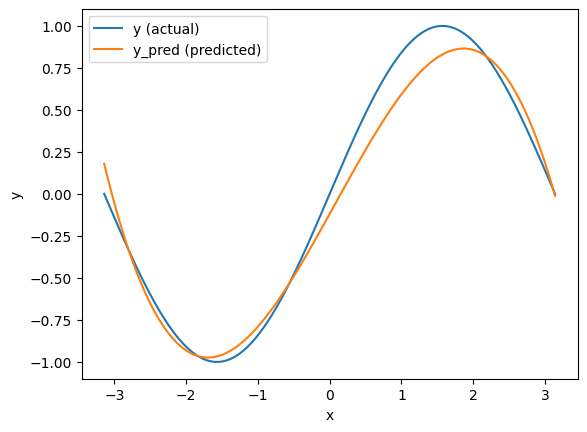

In [16]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-3
epochs = 3000
for t in range(epochs):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute and print loss
    loss = torch.mean((y_pred - y) ** 2)
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) / y.size(0)
    grad_a = torch.sum(grad_y_pred)
    grad_b = torch.sum(grad_y_pred * x)
    grad_c = torch.sum(grad_y_pred * x**2)
    grad_d = torch.sum(grad_y_pred * x**3)

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Check with the plot!
plot(y_pred, y, x)

## Autograd
### PyTorch: Tensors and autograd
In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

99 0.2696647644042969
199 0.2196536511182785
299 0.18103067576885223
399 0.14937254786491394
499 0.12341710180044174
599 0.10213272273540497
699 0.08467474579811096
799 0.07035227119922638
899 0.05859944969415665
999 0.04895299673080444
1099 0.041033465415239334
1199 0.034530289471149445
1299 0.029188858345150948
1399 0.02480052225291729
1499 0.021194322034716606
1599 0.01823011413216591
1699 0.015793045982718468
1799 0.013788794167339802
1899 0.012140084989368916
1999 0.0107834842056036
2099 0.009666952304542065
2199 0.008747759275138378
2299 0.007990813814103603
2399 0.007367303594946861
2499 0.006853560451418161
2599 0.006430172827094793
2699 0.006081127095967531
2799 0.005793305113911629
2899 0.005555892828851938
2999 0.005360004957765341
3099 0.005198339466005564
3199 0.005064865108579397
3299 0.004954640753567219
3399 0.0048635913990437984
3499 0.004788353573530912
3599 0.004726173356175423
3699 0.004674767144024372
3799 0.004632255528122187
3899 0.00459708645939827
3999 0.004567

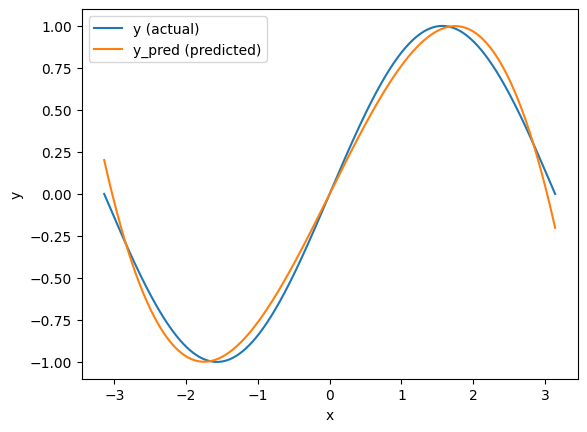

In [32]:
# Here You must use AUTOGRAD, ie, no need to calculate by hand the gradient.
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
epochs = 20000
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors. (same as above)
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = torch.mean((y_pred - y) ** 2)
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        # You can assign None or torch.zeros_like(a)
        a.grad = torch.zeros_like(a)
        b.grad = torch.zeros_like(b)
        c.grad = torch.zeros_like(c)
        d.grad = torch.zeros_like(d)

print(f"Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3")

# Check with the plot!
plot(y_pred.detach().numpy(), y, x)

## nn module
### PyTorch: nn
Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our polynomial model network:

In [ ]:
# Complete the ??? and the ...
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code,
# x.unsqueeze(-1) has shape  ???
# p has shape ???,
# For this case, broadcasting semantics will apply to obtain a tensor
# xx of shape ???

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    # Important note: Linear contains a matrix that is always applied to the last dimension of a tensor.
    torch.nn.Linear(3, 1),
    # After the linear layer, the shape is ...
    # Note: Flatten default arguments are Flatten(start_dim = 1, end_dim = -1)
    # By default, start_dim = 1 because 0 corresponds to the batch dimension.
    # We use flatten because we want the final tensor to match the shape of y.
    torch.nn.Flatten(start_dim=0, end_dim=1)
    # After the flatten layer, the shape is ...
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = ...

learning_rate = 1e-3
epochs = 3000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    ...

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    ...

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    ...

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= ...

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
plot(y_pred.detach().numpy(), y, x)

## PyTorch: optim
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(0, 1))
loss_fn = torch.nn.MSELoss(reduction="sum")

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = ...
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    ...


linear_layer = model[0]
print(
    f"Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3"
)

# Check with the plot!
plot(y_pred.detach().numpy(), y, x)